In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
cat_data = pd.read_csv('./data/categorical_features.csv', low_memory=False, dtype=int)
cat_data = cat_data.drop('Unnamed: 0', axis=1)
cat_data['id'] = cat_data['id'].astype(int)

In [4]:
cat_data = cat_data.astype(bool)

In [5]:
cat_data.shape

(243721, 99)

In [6]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")

In [7]:
reviews_data.shape

(243721, 5)

In [8]:
# select random rows
import numpy as np

np.random.seed(1234)
sample_size=50000
idxs = np.random.randint(0, cat_data.shape[0], sample_size)
idxs

array([224047, 189139, 165158, ..., 207985, 188182, 239826])

In [9]:
dependent_variable = 'review_scores_rating'

In [10]:
data = pd.concat([cat_data.loc[idxs], reviews_data.loc[idxs][[dependent_variable]]], axis=1)

In [11]:
data.sample(10)

,id,bed_type_airbed,bed_type_couch,bed_type_futon,bed_type_pull_out_sofa,bed_type_real_bed,room_type_entire_home_apt,room_type_private_room,room_type_shared_room,neighbourhood_cleansed_bayview,...,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_time_a_few_days_or_more,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,review_scores_rating
213734,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,98.0
241380,True,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,95.0
14629,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,100.0
224453,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,97.0
147580,True,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,98.0
166366,True,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,98.0
69280,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,True,False,91.0
88373,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,99.0
90804,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,100.0
102836,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,True,False,92.0


In [12]:
# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])

In [13]:
# Drop outliers from dependent variable
data = data.loc[data[dependent_variable] >= 80]

In [14]:
data.shape

(37929, 100)

bed_type_airbed


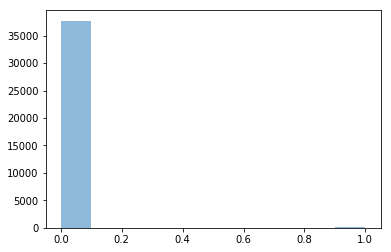

bed_type_couch


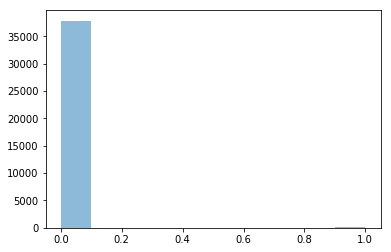

bed_type_futon


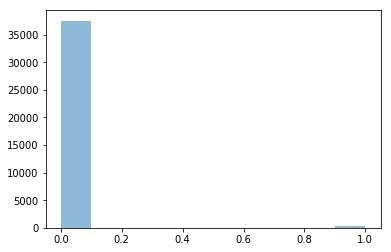

bed_type_pull_out_sofa


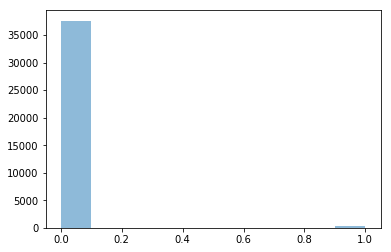

bed_type_real_bed


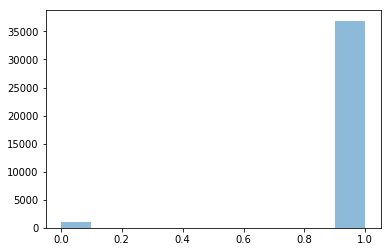

room_type_entire_home_apt


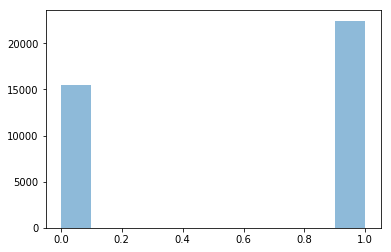

room_type_private_room


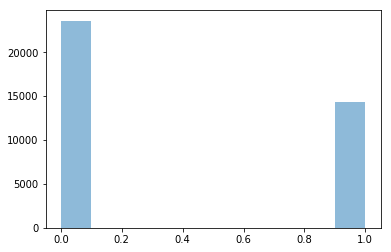

room_type_shared_room


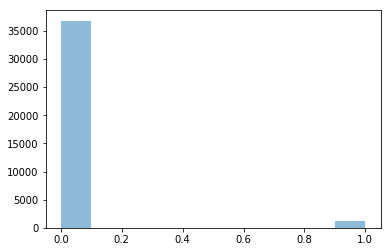

neighbourhood_cleansed_bayview


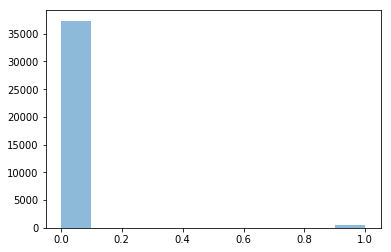

In [15]:
import matplotlib.pyplot as plt
for c in data.columns[:10]:
    if 'id' != c:
        print c
        lst = list(data[c].fillna('0'))
        plt.hist(lst, bins=10, alpha=0.5)
        plt.show()

bed_type_airbed


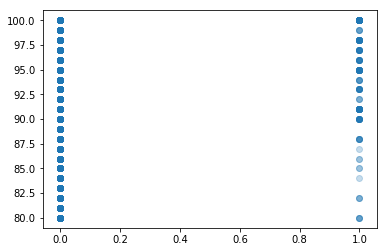

bed_type_couch


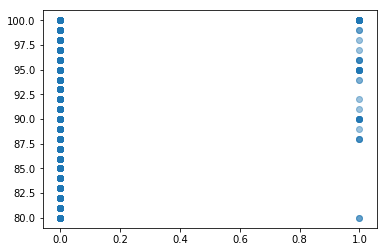

bed_type_futon


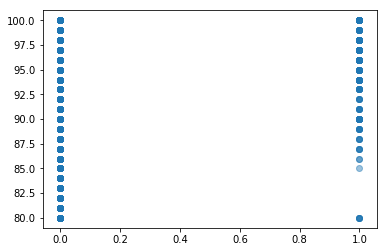

bed_type_pull_out_sofa


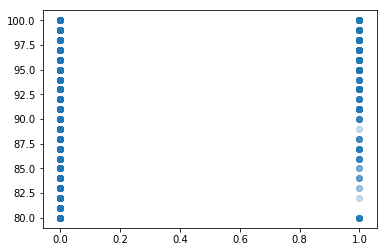

bed_type_real_bed


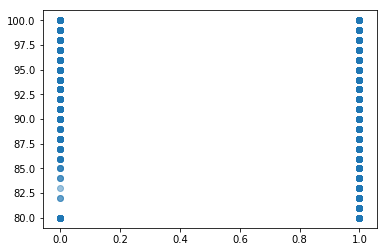

room_type_entire_home_apt


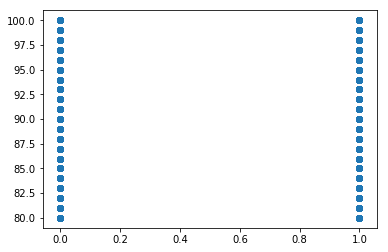

room_type_private_room


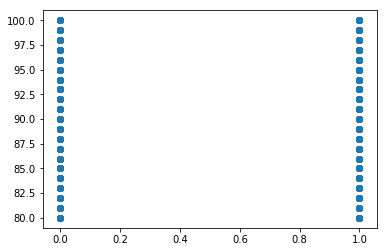

room_type_shared_room


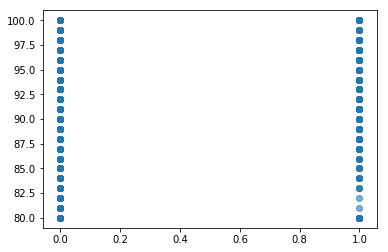

neighbourhood_cleansed_bayview


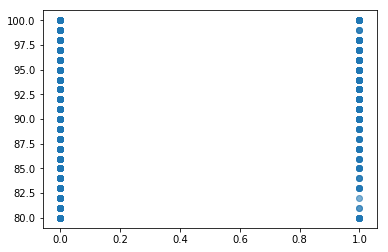

neighbourhood_cleansed_bernal_heights


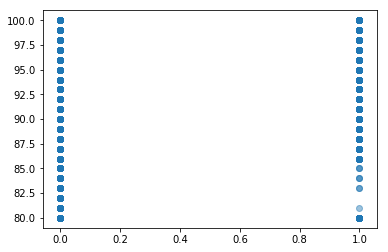

neighbourhood_cleansed_castro_upper_market


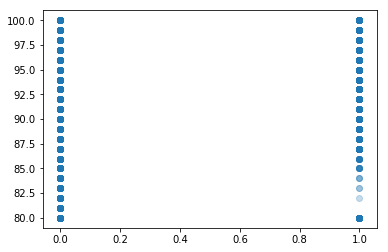

neighbourhood_cleansed_chinatown


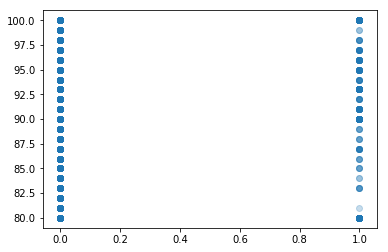

neighbourhood_cleansed_crocker_amazon


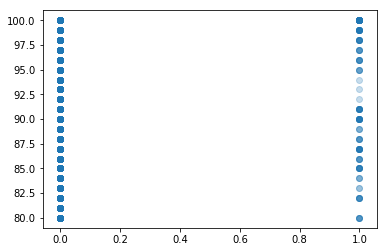

neighbourhood_cleansed_diamond_heights


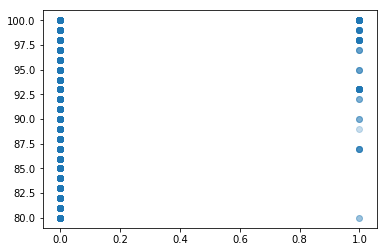

neighbourhood_cleansed_downtown_civic_center


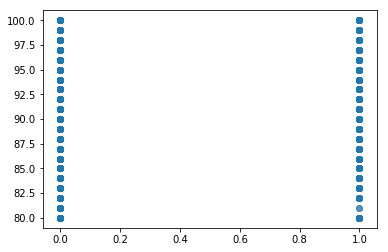

neighbourhood_cleansed_excelsior


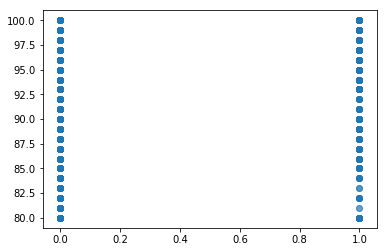

neighbourhood_cleansed_financial_district


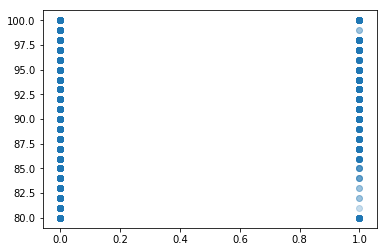

neighbourhood_cleansed_glen_park


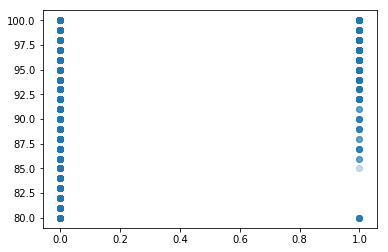

neighbourhood_cleansed_golden_gate_park


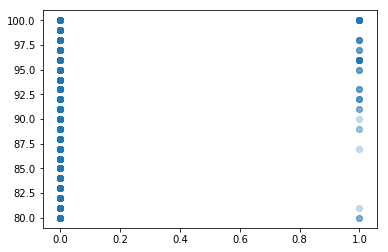

neighbourhood_cleansed_haight_ashbury


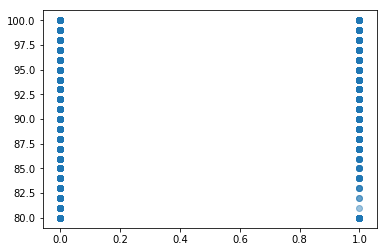

neighbourhood_cleansed_inner_richmond


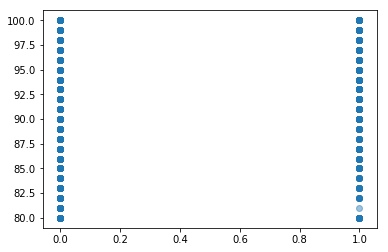

neighbourhood_cleansed_inner_sunset


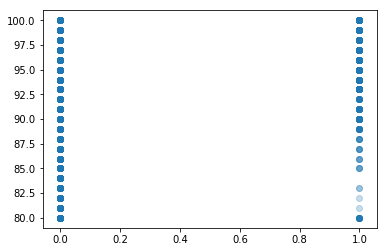

neighbourhood_cleansed_lakeshore


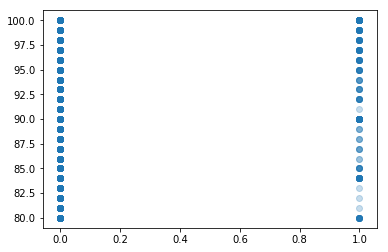

neighbourhood_cleansed_marina


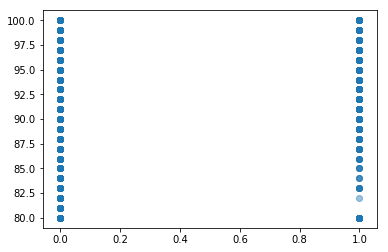

neighbourhood_cleansed_mission


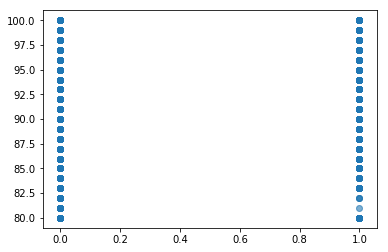

neighbourhood_cleansed_nob_hill


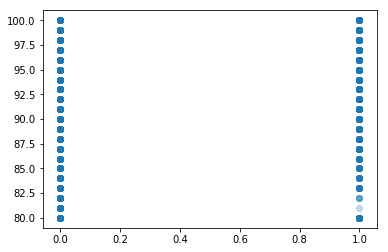

neighbourhood_cleansed_noe_valley


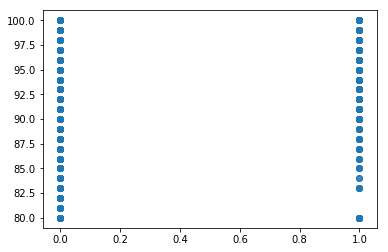

neighbourhood_cleansed_north_beach


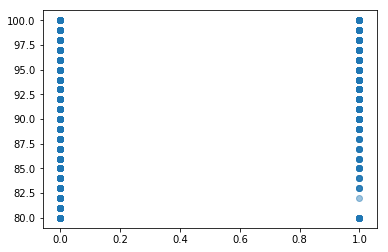

neighbourhood_cleansed_ocean_view


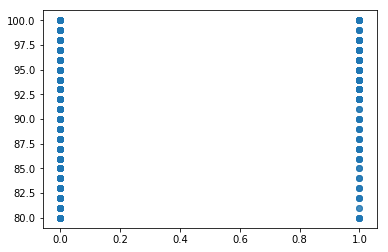

neighbourhood_cleansed_outer_mission


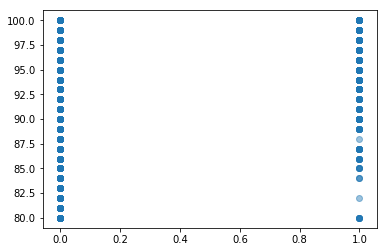

neighbourhood_cleansed_outer_richmond


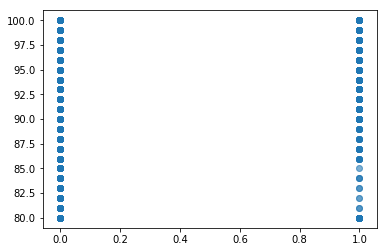

neighbourhood_cleansed_outer_sunset


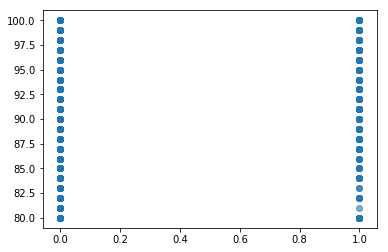

neighbourhood_cleansed_pacific_heights


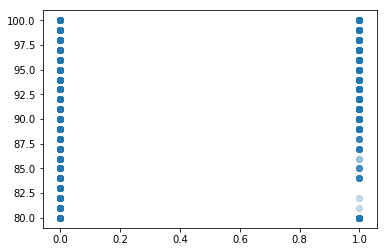

neighbourhood_cleansed_parkside


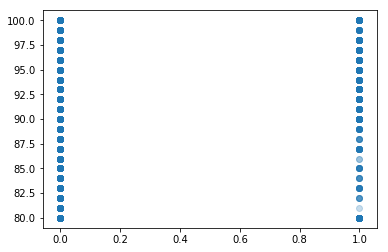

neighbourhood_cleansed_potrero_hill


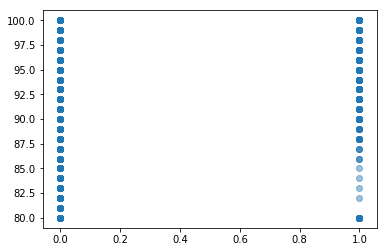

neighbourhood_cleansed_presidio


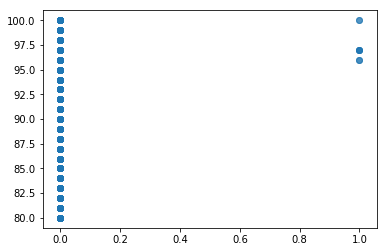

neighbourhood_cleansed_presidio_heights


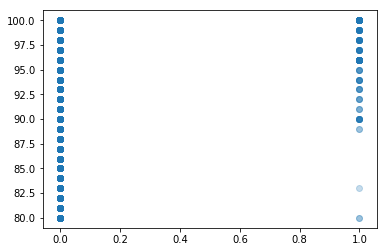

neighbourhood_cleansed_russian_hill


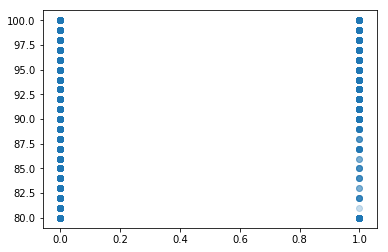

neighbourhood_cleansed_seacliff


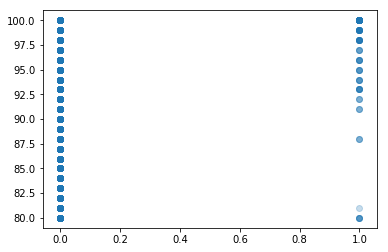

neighbourhood_cleansed_south_of_market


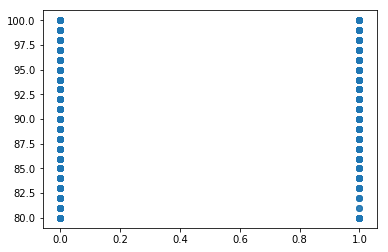

neighbourhood_cleansed_treasure_island_ybi


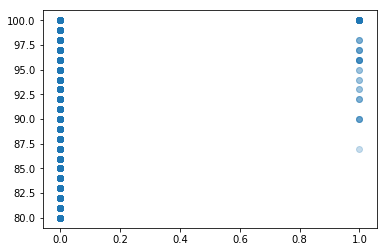

neighbourhood_cleansed_twin_peaks


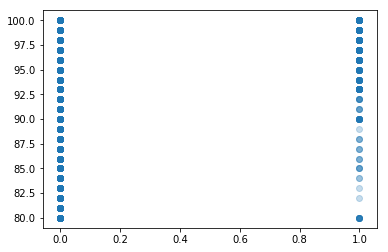

neighbourhood_cleansed_visitacion_valley


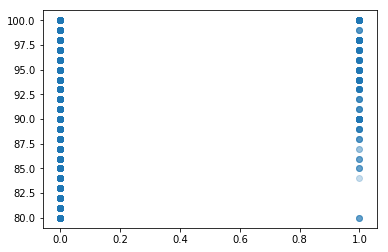

neighbourhood_cleansed_west_of_twin_peaks


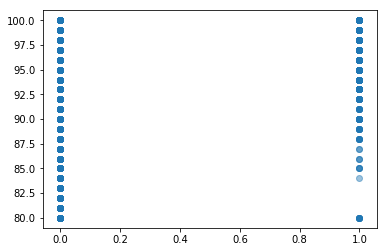

neighbourhood_cleansed_western_addition


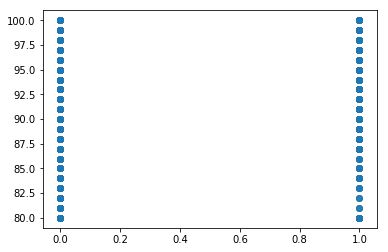

property_type_aparthotel


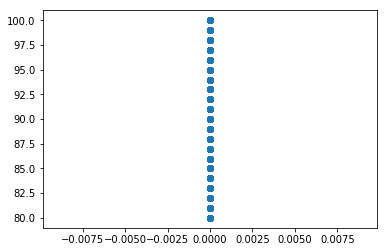

property_type_apartment


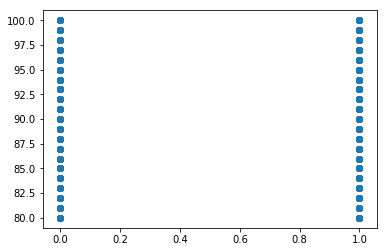

property_type_barn


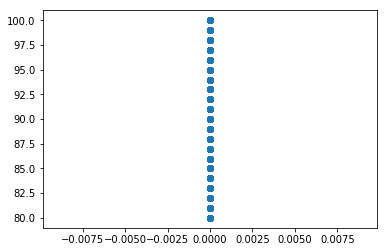

property_type_bed_breakfast


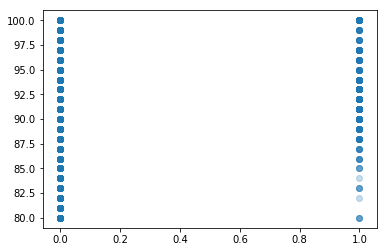

property_type_bed_and_breakfast


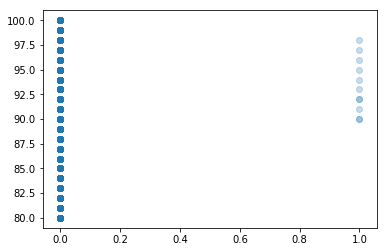

property_type_boat


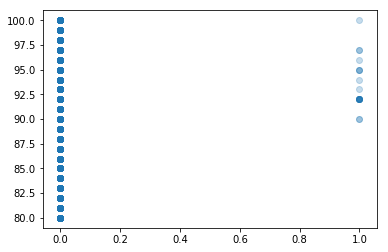

property_type_boutique_hotel


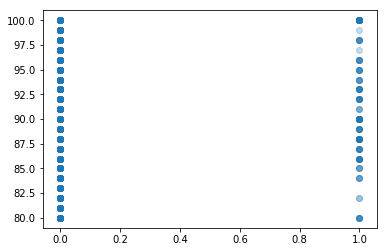

property_type_bungalow


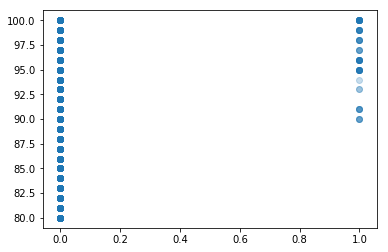

property_type_cabin


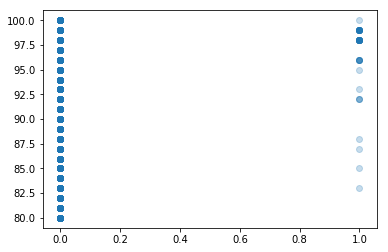

property_type_camper_rv


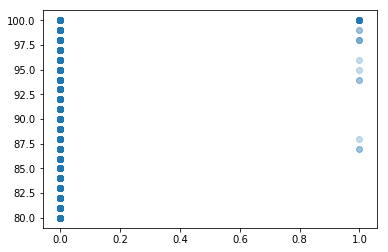

property_type_casa_particular


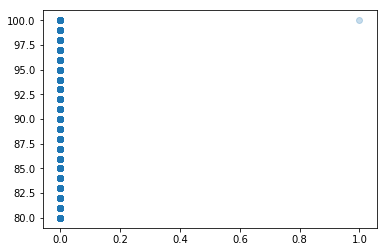

property_type_castle


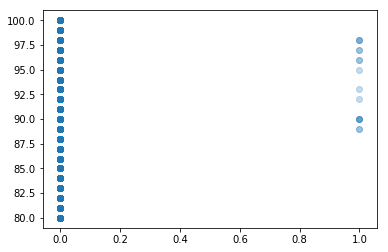

property_type_cave


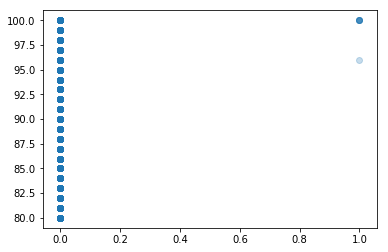

property_type_chalet


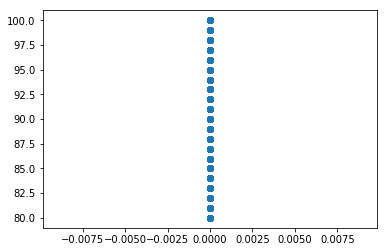

property_type_condominium


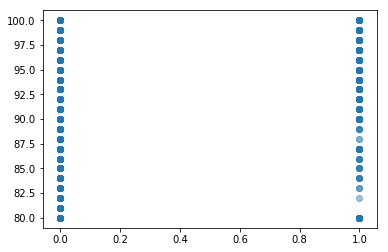

property_type_dorm


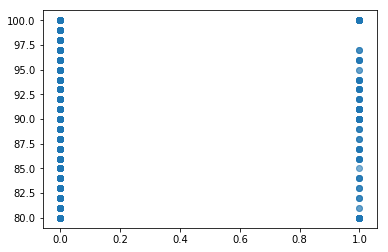

property_type_earth_house


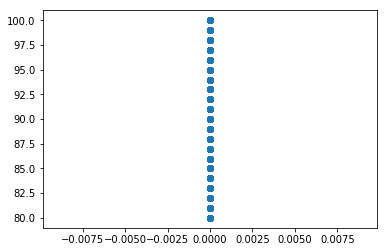

property_type_entire_floor


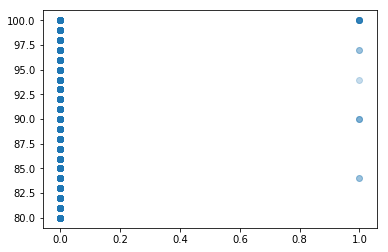

property_type_floor


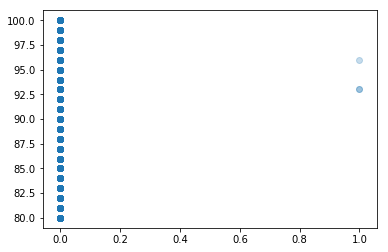

property_type_guest_suite


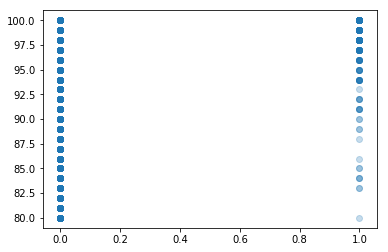

property_type_guesthouse


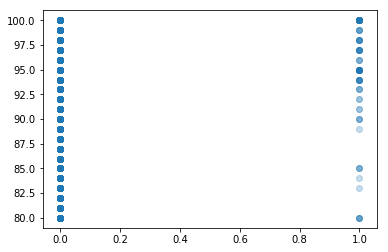

property_type_hostel


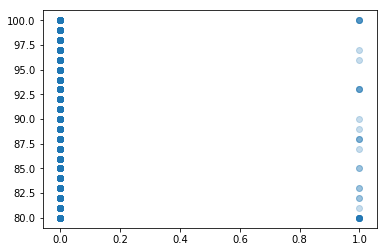

property_type_hotel


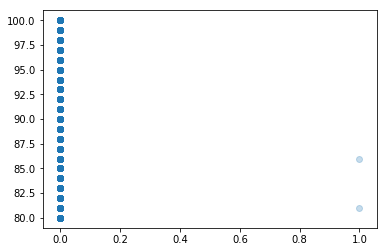

property_type_house


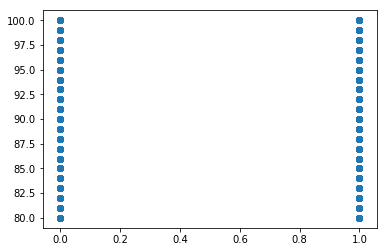

property_type_in_law


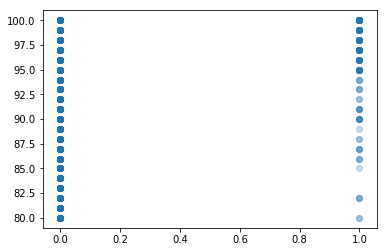

property_type_island


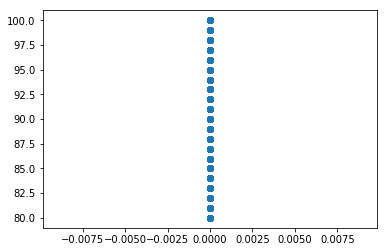

property_type_lighthouse


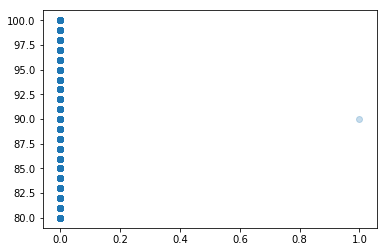

property_type_loft


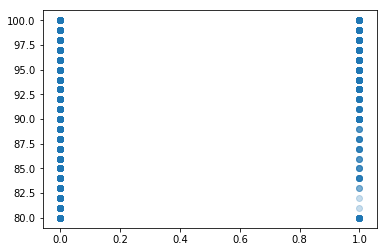

property_type_other


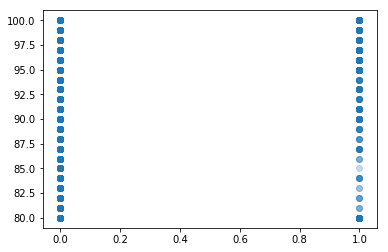

property_type_pension_korea


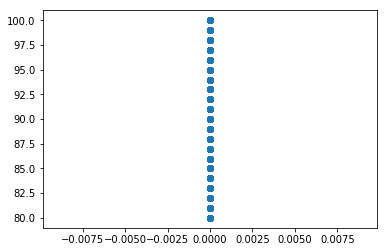

property_type_plane


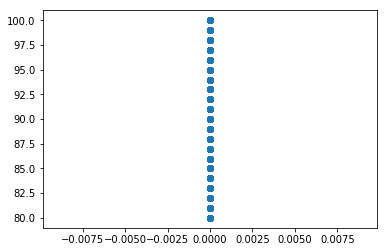

property_type_resort


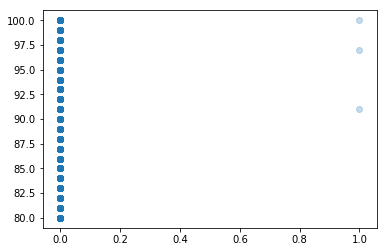

property_type_serviced_apartment


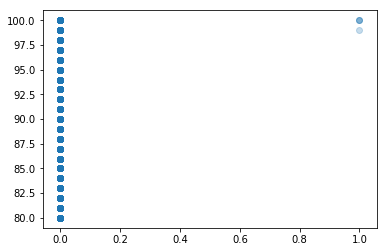

property_type_tent


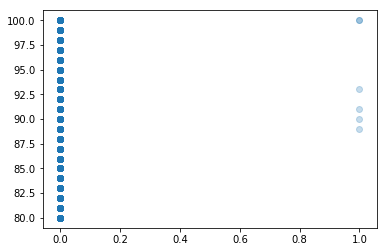

property_type_timeshare


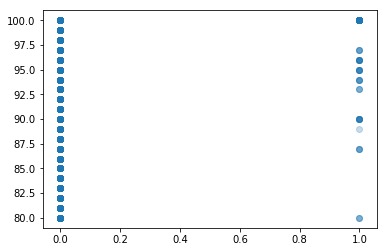

property_type_tiny_house


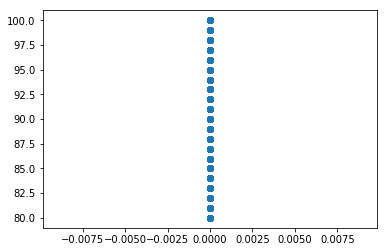

property_type_tipi


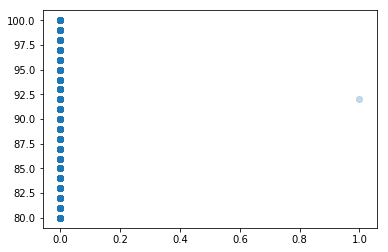

property_type_townhouse


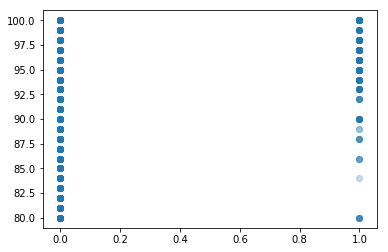

property_type_treehouse


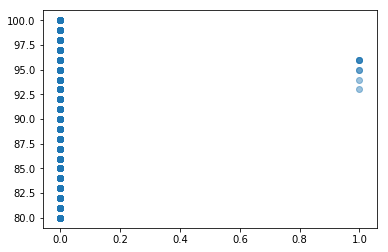

property_type_vacation_home


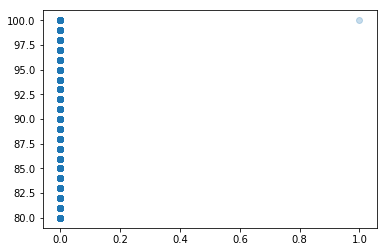

property_type_villa


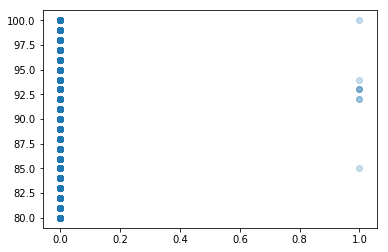

property_type_yurt


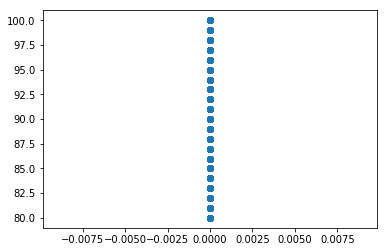

cancellation_policy_flexible


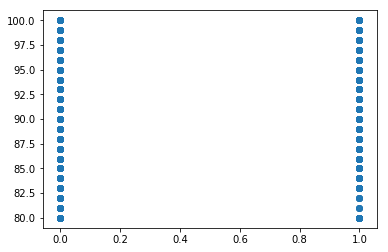

cancellation_policy_flexible_new


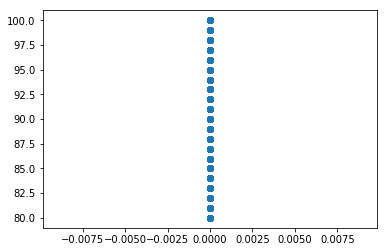

cancellation_policy_moderate


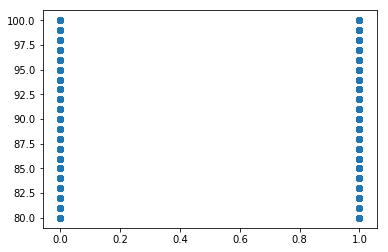

cancellation_policy_no_refunds


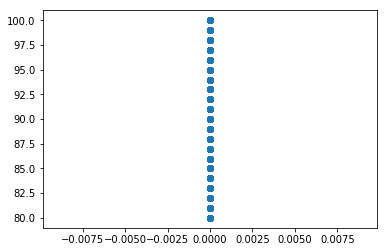

cancellation_policy_strict


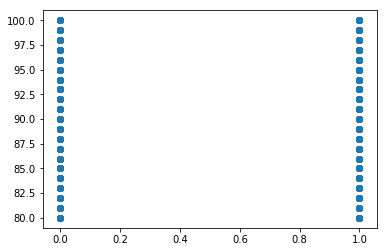

cancellation_policy_super_strict_30


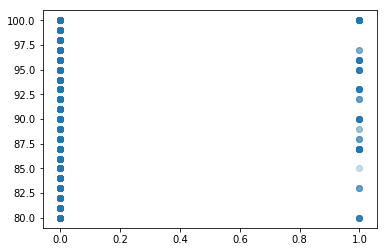

cancellation_policy_super_strict_60


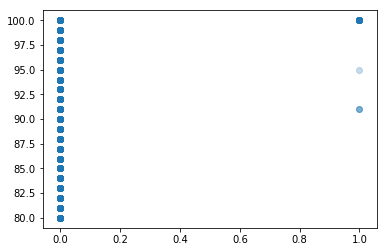

host_response_time_a_few_days_or_more


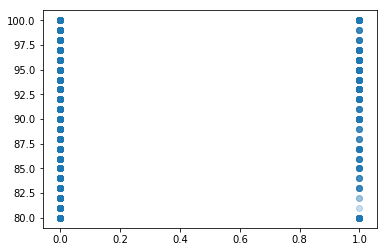

host_response_time_within_a_day


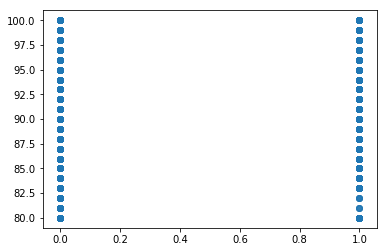

host_response_time_within_a_few_hours


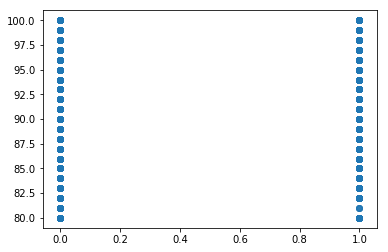

host_response_time_within_an_hour


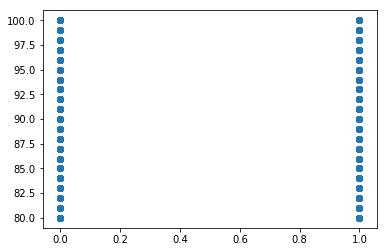

In [16]:
y_vals = data[dependent_variable].fillna(data[dependent_variable].mean())
for c in data.columns[:100]:
    if c not in ['id', dependent_variable]:
        print c
        lst = list(data[c].fillna('0'))
        plt.scatter(lst, y_vals, alpha=0.25)
        plt.show()

In [17]:
# Create the X and y
# Drop the columns that we do not need
y = data[dependent_variable]
X = data.drop(['id', dependent_variable], axis=1)

In [18]:
# Let's get rid of useless categorical features

from feature_selector import FeatureSelector

fs = FeatureSelector(data=X, 
                     labels=y)
fs.identify_single_unique()
fs.identify_zero_importance(task='regression', eval_metric='rmse')
fs.identify_low_importance(cumulative_importance=0.7)

X = fs.remove(methods=['single_unique', 'low_importance', 'zero_importance'])

11 features with a single unique value.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 4.75109
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 4.69392
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 4.79904
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 4.69309
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 4.79715
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 4.8207
Training until validation scores don't improve for 100 rounds.
Did not meet e

In [19]:
X.shape

(37929, 15)

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1234)

In [21]:
# Impute missing values using median for both independent and dependent variables

import numpy as np
from sklearn.preprocessing import Imputer

# imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
# imp.fit(X_train)
# X_train = imp.transform(X_train)
# X_test = imp.transform(X_test)

imp = Imputer(missing_values=np.nan, strategy='most_frequent', axis=1)
imp.fit(y_train)
y_train = imp.transform(y_train.values.reshape(-1,1))
y_train = y_train.ravel()
y_test= imp.transform(y_test.values.reshape(-1,1))
y_test = y_test.ravel()

print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(25412, 15)
(25412,)
(12517, 15)
(12517,)


In [22]:
# Scale the independent and dependent variables
# Center the data around zero by subtracting the mean
# Scale it to unit variance
# This is helpful in PCA

from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(y_train.reshape(-1,1))
y_train = scaler.transform(y_train.reshape(-1,1))
y_train = y_train.ravel()
y_test = scaler.transform(y_test.reshape(-1,1))
y_test = y_test.ravel()

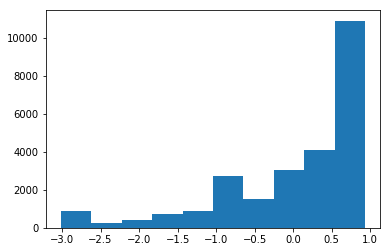

In [23]:
plt.hist(y_train)
plt.show()

In [24]:
# Divide each column by its variance
# y_train = np.log(y_train + 1)
# y_test = np.log(y_test + 1)
# x_train_var = X_train.var(axis=0)
# X_train = X_train / np.sqrt(x_train_var)
# X_test = X_test / np.sqrt(x_train_var)


In [25]:
# Try PCA
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Mean squared error: 0.99
Variance score: 0.01


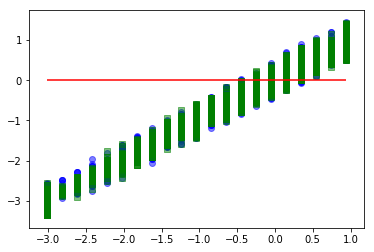

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score

# Create linear regression object
regr = linear_model.Lasso(alpha=0.0001, fit_intercept=False, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))

# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

In [27]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


kfold = model_selection.KFold(n_splits=20, shuffle=True, random_state=1234)


def build_model(model_name):
    return model_name()

for model_name in [LinearRegression, Ridge, ElasticNet, \
                   AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor]:
    
    model = build_model(model_name)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print model_name, results.mean()
    

<class 'sklearn.linear_model.base.LinearRegression'> -0.9863144399628354
<class 'sklearn.linear_model.ridge.Ridge'> -0.9863141757416092
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> -1.0001273881319876
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> -1.050969047020064
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> -0.9683516140512143
<class 'sklearn.ensemble.forest.RandomForestRegressor'> -0.9741773154648701


degree is: 4
Mean squared error: 0.97
r2 score: 0.04
explained variance score: 0.04


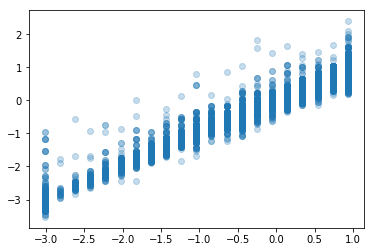

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score


degrees = [4]


for d in degrees:

    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=False, 
                                             interaction_only=True)
    model = GradientBoostingRegressor()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # The degree 
    print 'degree is: %s' % d
    
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))
    
    # Explained variance score: 1 is perfect prediction
    print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
    plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
    plt.show()

Mean squared error: 0.97
r2 score: 0.04
explained variance score: 0.04


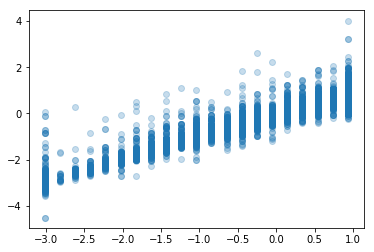

In [29]:
import xgboost


xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1, gamma=0.05, 
                          subsample=0.5, colsample_bytree=0.2, max_depth=20, 
                          objective='reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

In [37]:
from sklearn.cross_decomposition import PLSRegression


model = PLSRegression(n_components=10, scale=False)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
# plt.scatter(y_test.ravel(), (y_test-y_pred).ravel(), alpha=0.25)
# plt.show()

Mean squared error: 0.99
r2 score: 0.01
explained variance score: 0.01


# Try stacking on Categorical features

task:         [regression]
metric:       [rmse]
variant:      [A]
n_estimators: [3]

estimator  0: [gbf: GradientBoostingRegressor]
    fold  0:  [0.95468807]
    fold  1:  [0.99771297]
    fold  2:  [0.95909602]
    fold  3:  [0.96758566]
    fold  4:  [0.96609459]
    ----
    MEAN:     [0.96903546] + [0.01508503]

estimator  1: [xgb: XGBRegressor]
    fold  0:  [0.95347234]
    fold  1:  [1.00879827]
    fold  2:  [0.97145149]
    fold  3:  [0.97879931]
    fold  4:  [0.96349295]
    ----
    MEAN:     [0.97520287] + [0.01878827]

estimator  2: [randf: RandomForestRegressor]
    fold  0:  [0.95484556]
    fold  1:  [1.00711684]
    fold  2:  [0.97051803]
    fold  3:  [0.97960331]
    fold  4:  [0.96209990]
    ----
    MEAN:     [0.97483673] + [0.01813974]

Train set was detected.
Transforming...

estimator  0: [gbf: GradientBoostingRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: 

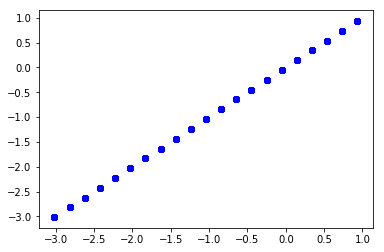

test residuals:


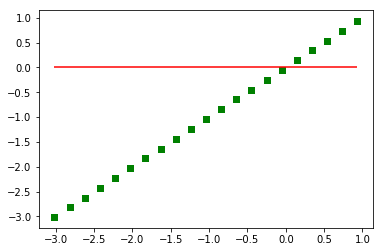

In [31]:
from vecstack import StackingTransformer
from vecstack import stacking
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

def rmse(train, pred):
    return mean_squared_error(train, pred)


lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.001, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                               subsample=0.75, max_depth=15)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')


estimators = [
              ('gbf', GradientBoostingRegressor(alpha=0.1)), 
              ('xgb', xgb), 
              ('randf', randf)]

stack = StackingTransformer(estimators, regression=True, 
                            shuffle=True, n_folds=5, 
                            metric=rmse, verbose=2, 
                           )

stack = stack.fit(X_train, y_train)

# Get stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

# Use 2nd level estimator on Stacked data
model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()